<a href="https://colab.research.google.com/github/BelenUrdangarin/Integrador-Urdangarin---Olivera/blob/main/Integrador_Olivera_Urdangarin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Energia renovable

Objetivo:
1.  Analizar la mayor fuente de energia renovable por región y continente
2.  Ver la tendencia de los paises segun el ingreso
3. Analizar la situación actual de los diferentes paises en material energetico, de población y de consumo energetico (Aquellos de interés)
4. Analizar proyecciones en materia de energia renovable para reducir la dependencia de combustibles fosiles.
5. Ver patrones climaticos de los paises de interes para generar soluciones en materia de energias renovables.
6. Hacer un analisis de lo anterior por region de forma comparativa

Acceso a la DATA
- https://data.worldbank.org/
- https://data360.worldbank.org/en/dataset/WB_SE4ALL (otro)
- https://www.kaggle.com/code/mehmetisik/02-the-evolution-of-modern-renewable-energy/input?select=01+renewable-share-energy.csv


Bibliografia
- https://www.irena.org/-/media/Files/IRENA/Agency/Publication/2022/Mar/IRENA_Renewable_Roadmap_Central_America_2022_ES.pdf

## Que tipos de energias renovables existen?
- Solar: se obtiene del sol a través de la radiación electromagnética, que incluye luz, calor y rayos ultravioleta. Se puede aprovechar de diferentes maneras, como con paneles solares fotovoltaicos y colectores solares térmicos.

- Eólica: aprovecha la fuerza del viento para generar electricidad. Este proceso se realiza a través de aerogeneradores, que capturan la energía cinética del viento y la convierten en electricidad.

- Hidráulica: utiliza la fuerza del agua en movimiento para generar electricidad.  Se aprovecha la energía cinética y potencial del agua en saltos de agua, corrientes o mareas para mover turbinas, las cuales, a través de un generador, producen electricidad.

- Otras: Dentro de esta categoria encontramos

 - Energía de Biomasa: Se aprovecha la materia orgánica (residuos orgánicos, cultivos energéticos, etc.) para generar energía, ya sea mediante combustión o conversión en biocombustibles.
 - Energía Geotérmica: Se utiliza el calor del interior de la Tierra para generar electricidad o calefacción.
 - Energía Marina: Se aprovecha la energía de las olas, mareas y corrientes marinas para generar electricidad.
 - Energía Mareomotriz: Utiliza la fuerza de las mareas para generar electricidad.
 - Energía Undimotriz: Utiliza la energía de las olas para generar electricidad.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

Vamos a cargar todos los archivos que vamos a utilizar, en orden de carga tenemos:

- En *ren_ener* encontramos datos sobre el acceso que tiene la poblacion de un país, rural o urbana a la electricidad, junto con la eficiencia energetica de cada país.

- En *cons_ren* encontramos el consumo de energia por país, continente y región.

- En *prod_ren* encontramos la producción de energia por país, región y continente.

- En *clim_pais* econtramos información sobre la locación, temperatura, precipitación y calidad de aire en la capital de cada país del mundo. Como hipótesis de simplificación se tendra en cuanta que la climatología del territorio de un país se supondra equivalente a la de su capital, aunque todo el territorio tenga diferentes biomas.
Mediante este dataset se pueden aprovechar sus datos para recomendar que tipo de fuente de energia se puede utilizar.

- En *pob_rural* encontramos la progresión del porcentaje de la población rural en cada país a través de los años.
Mediante este dataset podemos obtener la cantidad de población rural con acceso a la energia electrica y como se puede proponer una fuente de energia renovable que no dependa del tendido electrico convencional para alimentar a la comunidad.



In [114]:
ren_ener = pd.read_csv("https://raw.githubusercontent.com/BelenUrdangarin/Integrador-Urdangarin---Olivera/main/sus_ener.csv", sep=',',on_bad_lines='skip',na_values="..") #Importo los datos
cons_ren = pd.read_csv("https://raw.githubusercontent.com/BelenUrdangarin/Integrador-Urdangarin---Olivera/main/consener.csv", sep=',',on_bad_lines='skip',na_values="..")
prod_ren = pd.read_csv("https://raw.githubusercontent.com/BelenUrdangarin/Integrador-Urdangarin---Olivera/main/prodener.csv", sep=',',on_bad_lines='skip',na_values="..")
clim_pais = pd.read_csv("https://raw.githubusercontent.com/BelenUrdangarin/Integrador-Urdangarin---Olivera/main/GlobalWeatherRepository.csv", sep=',',on_bad_lines='skip',na_values="..")
pob_Rural = pd.read_csv("https://raw.githubusercontent.com/BelenUrdangarin/Integrador-Urdangarin---Olivera/main/Pob_Rural.csv", na_values=["..", "n/a", "NA", ""])

Fue necesario especificar el separador de columnas, saltear columnas que tengan datos extras y ademas de especificarle a pandas cual era el formato que utilizaba el dataframe como dato vacio, ya que no lo reconocia.

## Produccion mundial de energia renovable por continente y región

In [3]:
#Veamos cuantos datos manejamos
prod_ren.shape

(8851, 7)

In [4]:
prod_ren.tail() #Va hasta el año 2021

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.0,3.97,0.01,0.32
8847,Zimbabwe,ZWE,2018,0.0,5.05,0.02,0.39
8848,Zimbabwe,ZWE,2019,0.0,4.17,0.03,0.38
8849,Zimbabwe,ZWE,2020,0.0,3.81,0.03,0.35
8850,Zimbabwe,ZWE,2021,0.0,4.00,0.04,0.38


In [5]:
prod_ren.head(10) #Comienza en el año 2000

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0
5,Afghanistan,AFG,2005,0.0,0.59,0.0,0.0
6,Afghanistan,AFG,2006,0.0,0.64,0.0,0.0
7,Afghanistan,AFG,2007,0.0,0.75,0.0,0.0
8,Afghanistan,AFG,2008,0.0,0.54,0.0,0.0
9,Afghanistan,AFG,2009,0.0,0.78,0.0,0.0


In [6]:
prod_ren.columns

Index(['Entity', 'Code', 'Year', 'Electricity from wind (TWh)',
       'Electricity from hydro (TWh)', 'Electricity from solar (TWh)',
       'Other renewables including bioenergy (TWh)'],
      dtype='object')

In [7]:
prod_ren.drop(['Code'], axis=1, inplace=True) #Eliminamos la columna de codigo ya que no se encuentra relevante

In [8]:
prod_ren.head() #Comprobamos

,Entity,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,2000,0.0,0.31,0.0,0.0
1,Afghanistan,2001,0.0,0.50,0.0,0.0
2,Afghanistan,2002,0.0,0.56,0.0,0.0
3,Afghanistan,2003,0.0,0.63,0.0,0.0
4,Afghanistan,2004,0.0,0.56,0.0,0.0


In [9]:
#Renombramos las columnas para poder manejarlas de manera mas sencilla
prod_ren.rename(columns = {"Entity":"Country", "Electricity from wind (TWh)":"Wind (TWh)","Electricity from hydro (TWh)":"Hydro (TWh)", "Electricity from solar (TWh)":"Solar (TWh)", "Other renewables including bioenergy (TWh)":"Others (TWh)"}, inplace=True)

In [10]:
prod_ren.columns

Index(['Country', 'Year', 'Wind (TWh)', 'Hydro (TWh)', 'Solar (TWh)',
       'Others (TWh)'],
      dtype='object')

Chequeamos valores nulos o faltantes:

In [11]:
prod_ren.isna().sum()

,0
Country,0
Year,0
Wind (TWh),175
Hydro (TWh),11
Solar (TWh),168
Others (TWh),220


En este caso lo datos que se encuentran en cero no resultan una preocupación ya que la produccion de algun tipo de energia puede ser cero. Durante muchos años la producción de energia renovable no fue una opción y muchos paises no cuentan con las condiciones favorables para tener una de las diferentes clases de energía.


In [12]:
#La base de datos tiene una mezcla entre continentes, paises y de mas, asi que esta seccion es para crear diferentes
# bases de datos limpios
Contin = ['Africa','Asia','Europe', 'North America', 'Oceania', 'South America','World']
Empre = ['CIS (BP)','Africa (BP)','Africa (Ember)','Asia (Ember)','Europe (BP)','Europe (Ember)','European Union (27) (Ember)','North America (BP)','North America (Ember)','Oceania (Ember)','Latin America and Caribbean (Ember)']
Ggroup = ['G20 (Ember)', 'G7 (Ember)', 'Non-OECD (BP)','OECD (BP)','OECD (Ember)','USSR']
Incom_cont = ['High-income countries', 'Low-income countries','Lower-middle-income countries','Upper-middle-income countries']
Region = ['Central America (BP)','Asia Pacific (BP)','Eastern Africa (BP)','European Union (27)','South and Central America (BP)','Middle Africa (BP)','Middle East (BP)','North America','Western Africa (BP)']

In [13]:
cont_prod = prod_ren[prod_ren['Country'].isin(Contin)].reset_index() #Creamos un dataframe para los continentes
incom_prod = prod_ren[prod_ren['Country'].isin(Incom_cont)].reset_index() #Dataframe para los rangos de paises
region_prod = prod_ren[prod_ren['Country'].isin(Region)].reset_index() #Dataframe para las regiones en el mundo
cont_prod.drop(['index'], axis=1, inplace=True)
incom_prod.drop(['index'], axis=1, inplace=True)
region_prod.drop(['index'], axis=1, inplace=True)
region_prod['Country'] = region_prod['Country'].str.replace(r'\s+\(.*?\)$', '', regex=True) #Elimina los nombres incomodos al final de la region

In [14]:
categorias = Contin + Empre + Ggroup + Incom_cont + Region #Sumamor todas aquellas filas que no queremos en el dataframe de paises
prod_ren_fil = prod_ren[~prod_ren['Country'].isin(categorias)].reset_index() #Le quitamos al dataframe original las otras categorias
prod_ren_fil.drop(['index'], axis=1, inplace=True)
print(prod_ren_fil)

          Country  Year  Wind (TWh)  Hydro (TWh)  Solar (TWh)  Others (TWh)
0     Afghanistan  2000         0.0         0.31         0.00          0.00
1     Afghanistan  2001         0.0         0.50         0.00          0.00
2     Afghanistan  2002         0.0         0.56         0.00          0.00
3     Afghanistan  2003         0.0         0.63         0.00          0.00
4     Afghanistan  2004         0.0         0.56         0.00          0.00
...           ...   ...         ...          ...          ...           ...
7214     Zimbabwe  2017         0.0         3.97         0.01          0.32
7215     Zimbabwe  2018         0.0         5.05         0.02          0.39
7216     Zimbabwe  2019         0.0         4.17         0.03          0.38
7217     Zimbabwe  2020         0.0         3.81         0.03          0.35
7218     Zimbabwe  2021         0.0         4.00         0.04          0.38

[7219 rows x 6 columns]


Describo los datos del dataframe principal

In [15]:
prod_ren_fil.describe()

,Year,Wind (TWh),Hydro (TWh),Solar (TWh),Others (TWh)
count,7219.000000,7159.000000,7208.000000,7169.000000,7093.000000
mean,2000.931985,1.872740,18.282275,0.693809,1.723622
std,15.352330,17.264489,66.078045,7.763276,7.436581
min,1965.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,0.000000,0.010000,0.000000,0.000000
50%,2005.000000,0.000000,1.460000,0.000000,0.000000
75%,2013.000000,0.010000,9.337350,0.000000,0.330000
max,2022.000000,655.600000,1321.710000,327.000000,169.931580


## Deteccion de outliers

El z-score mide cuántas desviaciones estándar se aleja un valor de la media.

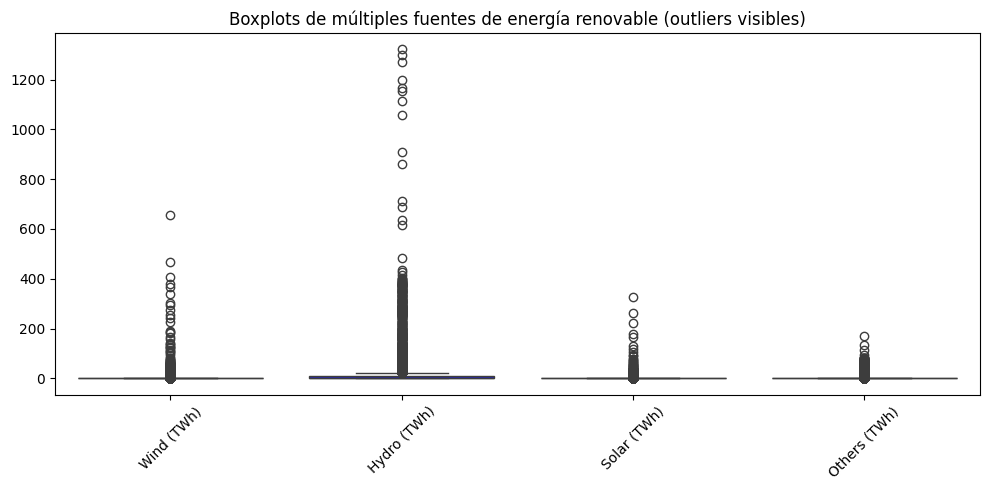

In [16]:
# Lista de columnas numéricas de las que quiero tomar datos para detectar outliers
cols = ['Wind (TWh)', 'Hydro (TWh)', 'Solar (TWh)', 'Others (TWh)']

# Calcular z-scores para cada columna
z_scores = prod_ren_fil[cols].apply(zscore)

# Detectar outliers
outliers = (np.abs(z_scores) > 3) #Se usa el 3 ya que se considera que es el valor de la desviacion donde cae el 99,7% de los valores

# Visualizar con boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=prod_ren_fil[cols], color='blue')
plt.title('Boxplots de múltiples fuentes de energía renovable (outliers visibles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Lo que podemos preguntarnos en base a los resultados obtenidos en el anterior grafico es a que pais o paises les pertenecen los altos valores de produccion hidroelectrica encontrada que se alejan de la media.

In [17]:
# Vamos a obtener el nombre del pais o paises cuya produccion hidroelectrica se encuentra por encima de 500 TWh
count_hydro_500 = prod_ren_fil[prod_ren_fil['Hydro (TWh)'] > 500]
print(count_hydro_500['Country'])

1287    China
1288    China
1289    China
1290    China
1291    China
1292    China
1293    China
1294    China
1295    China
1296    China
1297    China
1298    China
1299    China
1300    China
Name: Country, dtype: object


Observamos que aquel que presenta la mayor produccion es China, lo que nos lleva a analizar cual es su situacion en materia de lo anterior.

China es el mayor productor mundial de energía hidroeléctrica, con una producción de 1,301,702 GWh en 2021. La capacidad hidroeléctrica instalada en China en 2021 fue de 390,9 GW, incluyendo 36,4 GW de capacidad hidroeléctrica de almacenamiento por bombeo.

En 2020, China instaló 370 millones de kW de capacidad hidroeléctrica y generó un récord de 1.214 billones de kWh de energía. En total, China es líder mundial en producción hidroeléctrica, con aproximadamente el 29% de la capacidad hidroeléctrica mundial.


In [18]:
#Cual es el mayor valor de produccion Hidraulica de China y en que a;o fue

# Filtrar los datos de China
china_hydro = prod_ren_fil[prod_ren_fil['Country'] == 'China']

# Obtener el año y valor máximo de producción hidroeléctrica
max_hidro_china = china_hydro.loc[china_hydro['Hydro (TWh)'].idxmax()]
print(f"El mayor valor de producción hidroeléctrica de China fue {max_hidro_china['Hydro (TWh)']} TWh en el año {int(max_hidro_china['Year'])}.")

El mayor valor de producción hidroeléctrica de China fue 1321.71 TWh en el año 2020.


Cual es el aporte en porcentaje de China con respecto del total mundial?

In [19]:
# Ahora veamos cuanto de la produccion mundial de energia hidroelectrica (En procentaje) lo aporta solamente China
# Produccion total mundial
total_mundial_hydro = prod_ren['Hydro (TWh)'].sum()

# Producción total de China
china_total_hydro = prod_ren[prod_ren['Country'] == 'China']['Hydro (TWh)'].sum()

# Porcentaje de participación
porcentaje_china_hydro = (china_total_hydro / total_mundial_hydro) * 100

print(f"China aporta aproximadamente {porcentaje_china_hydro:.2f}% de la producción hidroeléctrica mundial.")

China aporta aproximadamente 1.92% de la producción hidroeléctrica mundial.


In [20]:
# Vamos a obtener el nombre del pais o paises cuya produccion eolica se encuentra por encima de 500 TWh y solar por encima de 200Twh
count_eol_500 = prod_ren_fil[prod_ren_fil['Wind (TWh)'] > 500]
count_solar_200 = prod_ren_fil[prod_ren_fil['Solar (TWh)'] > 200]
print(count_eol_500['Country'],count_solar_200['Country'])

1300    China
Name: Country, dtype: object 1298    China
1299    China
1300    China
Name: Country, dtype: object


Ya realizado el análisis de outliers, podemos comprobar que el mayor productor mundiar en materia de energia renovable es China y los outliers tienen sentido debido a que ha realizado inversiones masivas junto con politicas gubernamentales que promueven el desarrollo y la adopción de energias renovables.

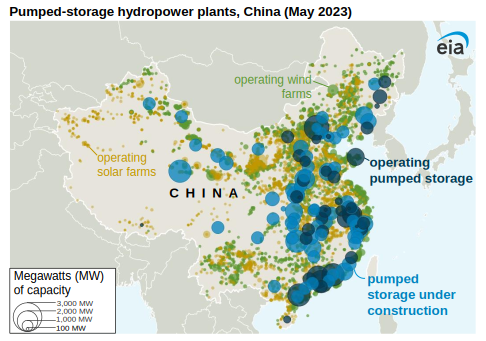

In [21]:
from IPython.display import SVG

SVG(url="https://www.eia.gov/todayinenergy/images/2023.08.09/chart2.svg")
#En la imagen se puede ver la distribución de la produccion de energia renovable en China

## Producción de energía renovable por continente y su comparación con la distribución mundial

Se reliza una suma de los valores historicos desde 1997, luego se trabaja con sus valores porcentuales ya que aportan mayor informacion en su visualizacion

In [22]:
production_by_cont = cont_prod.groupby('Country')[['Wind (TWh)', 'Hydro (TWh)', 'Solar (TWh)', 'Others (TWh)']].sum()
continent_percent = production_by_cont.div(production_by_cont.sum(axis=1), axis=0) * 100 #Lo convierto en porcentual para graficar
print(continent_percent)

               Wind (TWh)  Hydro (TWh)  Solar (TWh)  Others (TWh)
Country                                                          
Africa           2.980871    91.895045     1.704251      3.419833
Asia             8.606658    79.698022     4.824527      6.870792
Europe           9.909615    79.655663     2.903867      7.530855
North America    8.084349    81.008779     1.912544      8.994328
Oceania          7.790422    76.789489     4.205834     11.214254
South America    1.985404    93.716886     0.384699      3.913010
World            7.729968    82.267575     2.839695      7.162761


Observando los porcentajes, concluimos en que la tendencia mundial en la utilizacion de energia renovables recaer en la hidroelectrica en primer lugar, seguida por mucha diferencia de la eolica en segundo lugar.

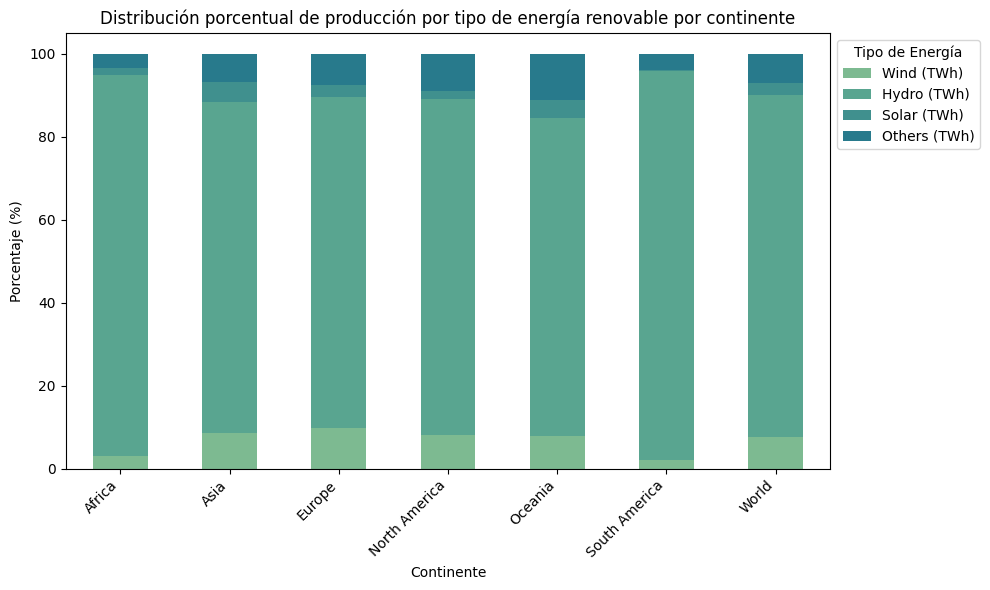

In [23]:
colors = sns.color_palette("crest")  # "flare", "crest", "rocket_r", "rocket"

continent_percent.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)
plt.title('Distribución porcentual de producción por tipo de energía renovable por continente')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Continente')
plt.xticks(rotation=45, ha='right') #Gira la etiqueta de nombres de las regiones 45 grados debido a que son muy largas
plt.legend(title='Tipo de Energía', bbox_to_anchor=(1,1), loc='upper left') #Ubica la leyenda de los datos en la esquina superior derecha
plt.tight_layout() #Acomoda las cosas en el grafico para que no se superpongan
plt.show()

## Analizamos la produccion de energia renovable por region

In [24]:
production_by_region = region_prod.groupby('Country')[['Wind (TWh)', 'Hydro (TWh)', 'Solar (TWh)', 'Others (TWh)']].sum()
region_percent = production_by_region.div(production_by_region.sum(axis=1), axis=0) * 100
print(region_percent)

                           Wind (TWh)  Hydro (TWh)  Solar (TWh)  Others (TWh)
Country                                                                      
Asia Pacific                 9.037122    78.624007     5.079989      7.258882
Central America              3.831781    76.290221     1.419332     18.458666
Eastern Africa               0.592874    93.799978     0.381967      5.225181
European Union              16.535060    66.432702     5.327792     11.704447
Middle Africa                0.007729    99.664922     0.076416      0.250934
Middle East                  1.447908    91.858392     6.295193      0.398507
North America                8.084349    81.008779     1.912544      8.994328
South and Central America    2.102738    92.338984     0.451886      5.106392
Western Africa               0.314317    98.024978     0.686425      0.974280


Resulta de interes observar que aunque la tabla es liderada por la energia hidraulica, es posible observar el caso de regiones como Centro America que tiene un gran aporte en la categoria "Others" coincidente con la grandes inversiones realizadas para potenciar la energia proveniente de fuentes geotermicas.

(Ver Costa Rica, El Salvador y Nicaragua)

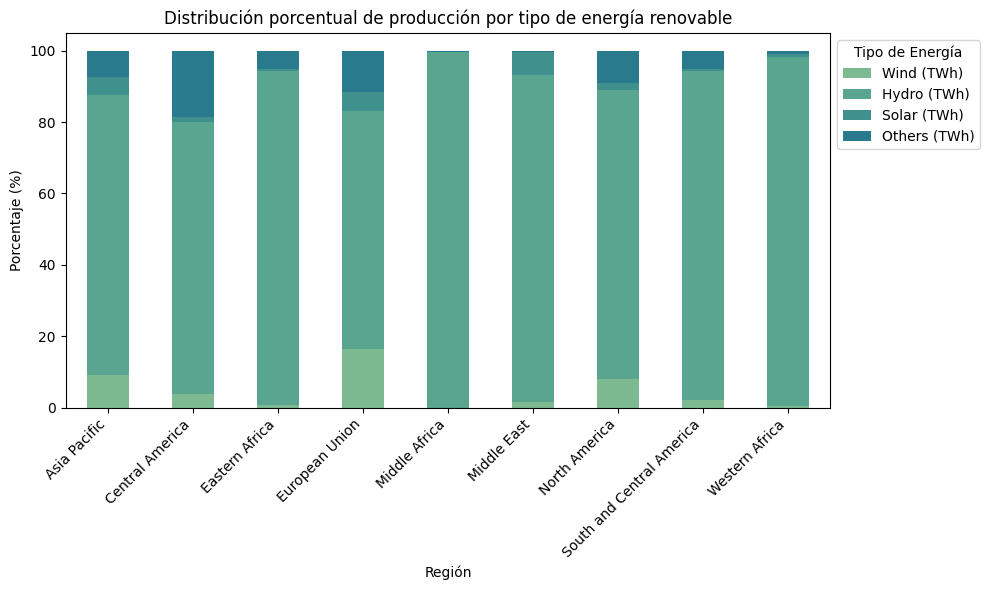

In [25]:
colors = sns.color_palette("crest")  # "flare", "crest", "rocket_r", "rocket"

region_percent.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)
plt.title('Distribución porcentual de producción por tipo de energía renovable')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Región')
plt.xticks(rotation=45, ha='right') #Gira la etiqueta de nombres de las regiones 45 grados debido a que son muy largas
plt.legend(title='Tipo de Energía', bbox_to_anchor=(1,1), loc='upper left') #Ubica la leyenda de los datos en la esquina superior derecha
plt.tight_layout() #Acomoda las cosas en el grafico para que no se superpongan
plt.show()

## Se puede visualizar la tendencia que existe en los países segun el ingreso economico y como eso repercute en la inversiones en materia de energias renovables.

Segun el ingreso economico los paises se clasifican como:

- Ingresos Altos
- Ingresos medios - altos
- Ingresos medios - bajos
- Ingresos bajos

El mapa mundial actual de la distribución de paises segun los ingresos, puede encontrarse a continuación

In [26]:
from IPython.display import Image, display

url = "https://elordenmundial.com/wp-content/webp-express/webp-images/doc-root/wp-content/uploads/2023/08/nivel-ingresos-mundo-mapa.png.webp"
display(Image(url=url))

In [27]:
production_by_incom = incom_prod.groupby('Country')[['Wind (TWh)', 'Hydro (TWh)', 'Solar (TWh)', 'Others (TWh)']].sum()
income_percent = production_by_incom.div(production_by_incom.sum(axis=1), axis=0) * 100 #Lo convierto en porcentual para graficar
print(income_percent)

                               Wind (TWh)  Hydro (TWh)  Solar (TWh)  \
Country                                                               
High-income countries            9.651285    77.540211     3.379213   
Low-income countries             0.463223    97.523239     0.559143   
Lower-middle-income countries    5.241925    82.416298     2.755368   
Upper-middle-income countries    6.648436    86.665637     2.469908   

                               Others (TWh)  
Country                                      
High-income countries              9.429291  
Low-income countries               1.454395  
Lower-middle-income countries      9.586409  
Upper-middle-income countries      4.216018  


En la presentacion en porcentaje se puede observar como los paises de mayores recursos tienen una producción mas diversificada en materia de energia renovable. Lo que se puede observar mejor en el siguiente gráfico.

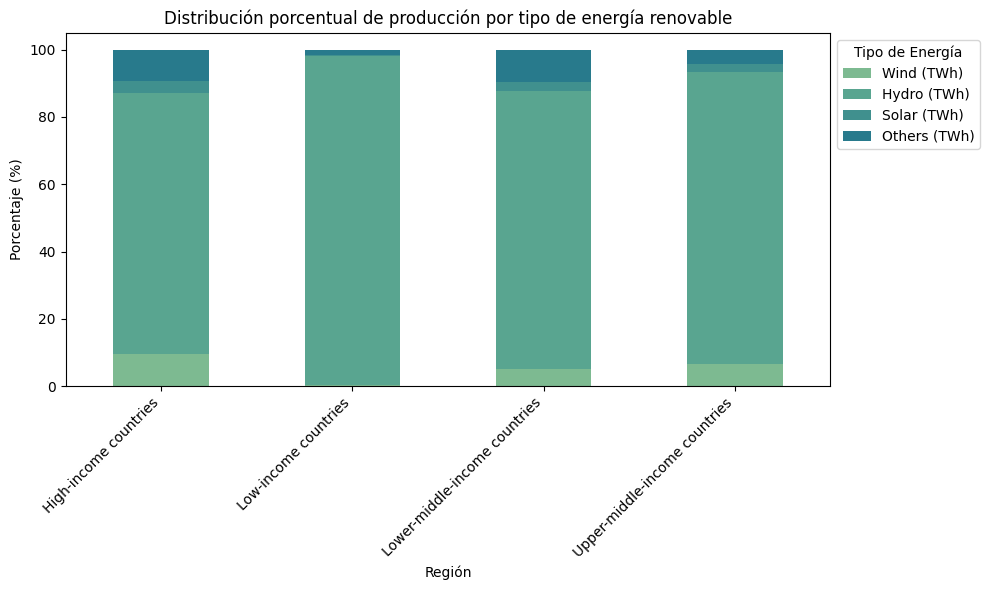

In [28]:
colors = sns.color_palette("crest")  # "flare", "crest", "rocket_r", "rocket"

income_percent.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)
plt.title('Distribución porcentual de producción por tipo de energía renovable')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Región')
plt.xticks(rotation=45, ha='right') #Gira la etiqueta de nombres de las regiones 45 grados debido a que son muy largas
plt.legend(title='Tipo de Energía', bbox_to_anchor=(1,1), loc='upper left') #Ubica la leyenda de los datos en la esquina superior derecha
plt.tight_layout() #Acomoda las cosas en el grafico para que no se superpongan
plt.show()

La tendencia pareceria indicar que cuanto mayores son los ingresos de un país, mas diversificada es la produccion de energia renovable y mas independiente es de la produccion de energia hidroelectrica.

 **Por qué la produccion de hidroelectrica es mas común?**

La energía hidroeléctrica es la más común por sobre la solar o eólica principalmente por su capacidad de generar energía de forma constante y fiable, sin depender de factores externos como el sol o el viento, fuentes consideradas mas intermitentes, entonces en paises de bajos ingresos, parece ser que la inversion mas segura es en energia hidroeléctrica.

## Análicemos la situacion de los paises en materia de consumo, producción y población

A continuación se presenta otro dataset con informacion sobre acceso a la electricidad.

In [115]:
ren_ener.head(5) #Va desde el año 1997

,Country Name,Country Code,Time,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
0,Afghanistan,AFG,1997,YR1997,NaN,NaN,0.010000,64.409889,1.599237,485.0,72.388060,9861.213,41.432601,670.0,23800.613025
1,Afghanistan,AFG,1998,YR1998,NaN,NaN,0.021977,66.160934,1.648978,495.0,74.436090,10254.290,44.094337,665.0,23255.344635
2,Afghanistan,AFG,1999,YR1999,NaN,NaN,0.179635,67.904762,1.570681,505.0,73.722628,10765.990,52.185774,685.0,20630.124070
3,Afghanistan,AFG,2000,YR2000,8.80,NaN,0.959756,69.640984,1.686173,515.7,74.989094,11301.390,54.243126,687.7,20834.695115
4,Afghanistan,AFG,2001,YR2001,9.51,NaN,0.776537,71.371780,1.827399,503.2,72.811460,11510.280,54.055055,691.1,21293.623680


In [116]:
#Veamos cuantos datos manejamos
ren_ener.shape

(4880, 15)

In [117]:
ren_ener.tail() #Va hasta el año 2016

,Country Name,Country Code,Time,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
4875,Zimbabwe,ZWE,2012,YR2012,30.02,12.981644,36.728878,85.306770,18.437246,5558.0,60.393350,304744.9,78.019702,9203.0,390599.927892
4876,Zimbabwe,ZWE,2013,YR2013,29.88,13.669918,37.076813,85.351479,18.152967,5162.0,53.939394,311169.4,79.561094,9570.0,391107.493656
4877,Zimbabwe,ZWE,2014,YR2014,29.63,9.800000,32.300000,83.400000,15.749581,5575.0,55.605426,320293.3,81.049292,10026.0,395183.343456
4878,Zimbabwe,ZWE,2015,YR2015,29.36,9.700000,33.700000,81.200000,15.803897,5119.0,52.724276,324422.6,81.797809,9709.0,396615.270924
4879,Zimbabwe,ZWE,2016,YR2016,29.05,15.575584,38.145138,85.500160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
ren_ener.columns

Index(['Country Name', 'Country Code', 'Time', 'Time Code',
       'Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]',
       'Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]',
       'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
       'Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]',
       'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
       'Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]',
       'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
       'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
       'Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]',
       'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
       'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.

Tenemos en total 15 columnas, cuyas descripciones son:

1. Nombre del País

2. Código del país

3. Año (1997 - 2016)

4. Codigo del año

5. Acceso a combustibles limpios y tecnologias para cocinar (%): Mide la cantidad de gente que puede cocinar de forma limpia y segura, sin combustibles que contaminan el aire interior.

6. Porcentaje de población rural con acceso a la electricidad

7. Porcentaje total de población con acceso a la electricidad (Total de un país)

8. Porcentaje de poblacion urbana con acceso a la electricidad

9. Nivel de la intensidad energetica de la energia primaria: Es una medida que indica cuanta energia primaria se necesita para producir una unidad de Producto Bruto Interno (PBI) de una economía. Refleja la eficiencia con la que una economía utiliza energia para generar riqueza, Una relación mas baja significa que la economía utiliza menos energía para producir una unidad de PIB, lo que indica mayor eficiencia energetica.

10. Producción de energia renovable: cantidad total de energía eléctrica, medida en gigavatios-hora (GWh), generada por fuentes de energía renovables como la solar, eólica, hidroeléctrica, geotérmica, y biomasa.

11. Presenta el porcentaje de energia renovable producida en comparación con el total de energia producida por país.

12. Consumo de energia renovable.

13. Representa el porcentaje de energia renovable consumida en relacion con el total de consumo de energia.

14. Presenta el total de produción de energia generada por las plantas en Gigawatts por hora.

15. Consumo total de energia considerando esta como materia prima, sin considerar aquel recurso que no se utiliza para producir la misma.

In [119]:
ren_ener.drop(['Country Code', 'Time Code'], axis=1, inplace=True)

In [120]:
#Renombramos las columnas para poder manejarlas de manera mas sencilla
ren_ener.rename(columns = {"Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]":"ACFFC (%)", "Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]":"AERP (%)","Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]":"AEUP (%)", "Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]":"EILPE (MJ/2011 USD PPP)", "Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]":"REO (GWh)","Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]":"RESTEO (%)", "Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]":"TFEC (TJ)", "Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]":"AETP (%)", "Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]":"Ren cons (TJ)", "Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]":"CSREN (%)", "Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]":"TWO (GWh)"}, inplace=True)

In [121]:
ren_ener.columns

Index(['Country Name', 'Time', 'ACFFC (%)', 'AERP (%)', 'AETP (%)', 'AEUP (%)',
       'EILPE (MJ/2011 USD PPP)', 'REO (GWh)', 'RESTEO (%)', 'Ren cons (TJ)',
       'CSREN (%)', 'TWO (GWh)', 'TFEC (TJ)'],
      dtype='object')

In [122]:
#Eliminamos las columnas que no nos interesan
ren_ener.drop(['EILPE (MJ/2011 USD PPP)', 'TWO (GWh)', 'TFEC (TJ)', 'Ren cons (TJ)', 'Ren cons (TJ)'], axis=1, inplace=True)

Para hacer un análisis generico podemos rellenar aquellos valores vacios con valores frecuentes, maximos, minimo y percentiles, para luego centrarnos en los casos particulares.

In [123]:
ren_ener.describe()

,Time,ACFFC (%),AERP (%),AETP (%),AEUP (%),REO (GWh),RESTEO (%),CSREN (%)
count,4880.000000,3026.000000,3718.000000,4031.000000,4031.000000,4.126000e+03,4126.000000,3961.000000
mean,2006.500000,61.565486,72.593428,78.245989,88.678539,1.638908e+04,27.377850,29.411207
std,5.766872,38.087967,36.179034,31.556899,20.730079,6.812439e+04,32.709321,30.034494
min,1997.000000,0.150000,0.007659,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2001.750000,22.030000,41.980589,61.877952,87.752075,0.000000e+00,0.000000,3.307738
50%,2006.500000,78.910000,95.688812,97.950607,99.500000,4.300000e+02,11.324695,18.084141
75%,2011.250000,97.567500,100.000000,100.000000,100.000000,5.820250e+03,49.290081,49.807809
max,2016.000000,100.000000,100.000000,100.000000,100.000000,1.398321e+06,100.000000,97.923782


### Veremos cuantos valores faltantes tengo por columna

In [124]:
ren_ener.isna().sum()

,0
Country Name,0
Time,0
ACFFC (%),1854
AERP (%),1162
AETP (%),849
AEUP (%),849
REO (GWh),754
RESTEO (%),754
CSREN (%),919


- ACFFC (%): En el caso del acceso de fuentes limpias para cocinar, los valores varios son los de los primeros 3 años, por lo que se puede obtar por directamente eliminar esos valores.

- AERP (%): En el caso del acceso a la electricidad de la población rural, utilizaremos el valor minimo para ser conservativos, ya que la mayoria de los valores faltante corresponden a paises de bajos ingresos económicos

- AETP (%) y AEUP (%): los datos vacios corresponden a paises especificos sin datos sobre ellos en general.

- REO (GWh) y RESTEO (%): el valor de la produccion de energia renovable que se encuentra vacio en este caso es el maximo perteneciente al año 2016.

- CSREN (%): El porcentaje del valor de consumo de energia renovable es el ultimo para cada pais tambien.
En los ultimos dos casos, usar un promedio mundial es un grave error ya que hay muchas realidades diferentes, por lo que se opta en rellenar el ultimo valor con el anterior.

In [170]:
ren_ener.dropna(subset=['ACFFC (%)', 'AETP (%)', 'AEUP (%)'], inplace=True) #Eliminas las filas donde la columna ACFFC (%) tenga un valor vacio

min_value = ren_ener['AERP (%)'].min()
ren_ener['AERP (%)'] = ren_ener['AERP (%)'].fillna(min_value) #Otorga el valor minimo cuando AERP este vacío


# Rellenar valores de 2016 con los de 2015
for country in ren_ener['Country Name'].unique():
    # Filtrar datos por país
    country_data = ren_ener[ren_ener['Country Name'] == country]

    # Rellenar los valores de 2016 con los de 2015
    ren_ener.loc[(ren_ener['Country Name'] == country) & (ren_ener['Time'] == 2016), 'CSREN (%)'] = country_data[country_data['Time'] == 2015]['CSREN (%)'].values[0]
    ren_ener.loc[(ren_ener['Country Name'] == country) & (ren_ener['Time'] == 2016), 'REO (GWh)'] = country_data[country_data['Time'] == 2015]['REO (GWh)'].values[0]
    ren_ener.loc[(ren_ener['Country Name'] == country) & (ren_ener['Time'] == 2016), 'RESTEO (%)'] = country_data[country_data['Time'] == 2015]['RESTEO (%)'].values[0]

In [171]:
ren_ener.drop(['REO (%)'], axis=1, inplace=True) #Eliminamos una columna que aparece en el calculo anterior y no necesitamos
ren_ener.isna().sum()
#Comprobamos que no tenemos ningun dato faltante

,0
Country Name,0
Time,0
ACFFC (%),0
AERP (%),0
AETP (%),0
AEUP (%),0
REO (GWh),0
RESTEO (%),0
CSREN (%),0


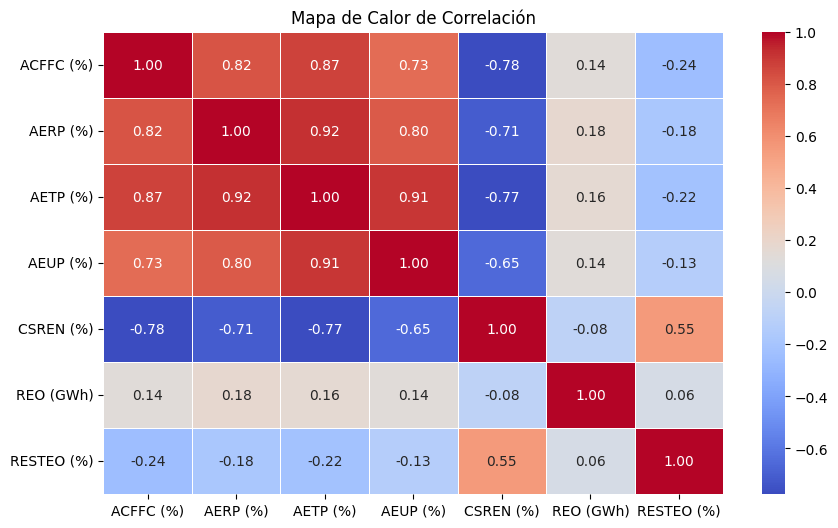

In [172]:
# Ya con todos los datos nulos resueltos, podemos generar un mapa de calor para ver la correlación que se encuentra entre las diferentes columnas del DF
corr_columns = ['ACFFC (%)', 'AERP (%)', 'AETP (%)', 'AEUP (%)', 'CSREN (%)', 'REO (GWh)', 'RESTEO (%)']

# Calcular la matriz de correlación
corr_matrix = ren_ener[corr_columns].corr()

# Graficar el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

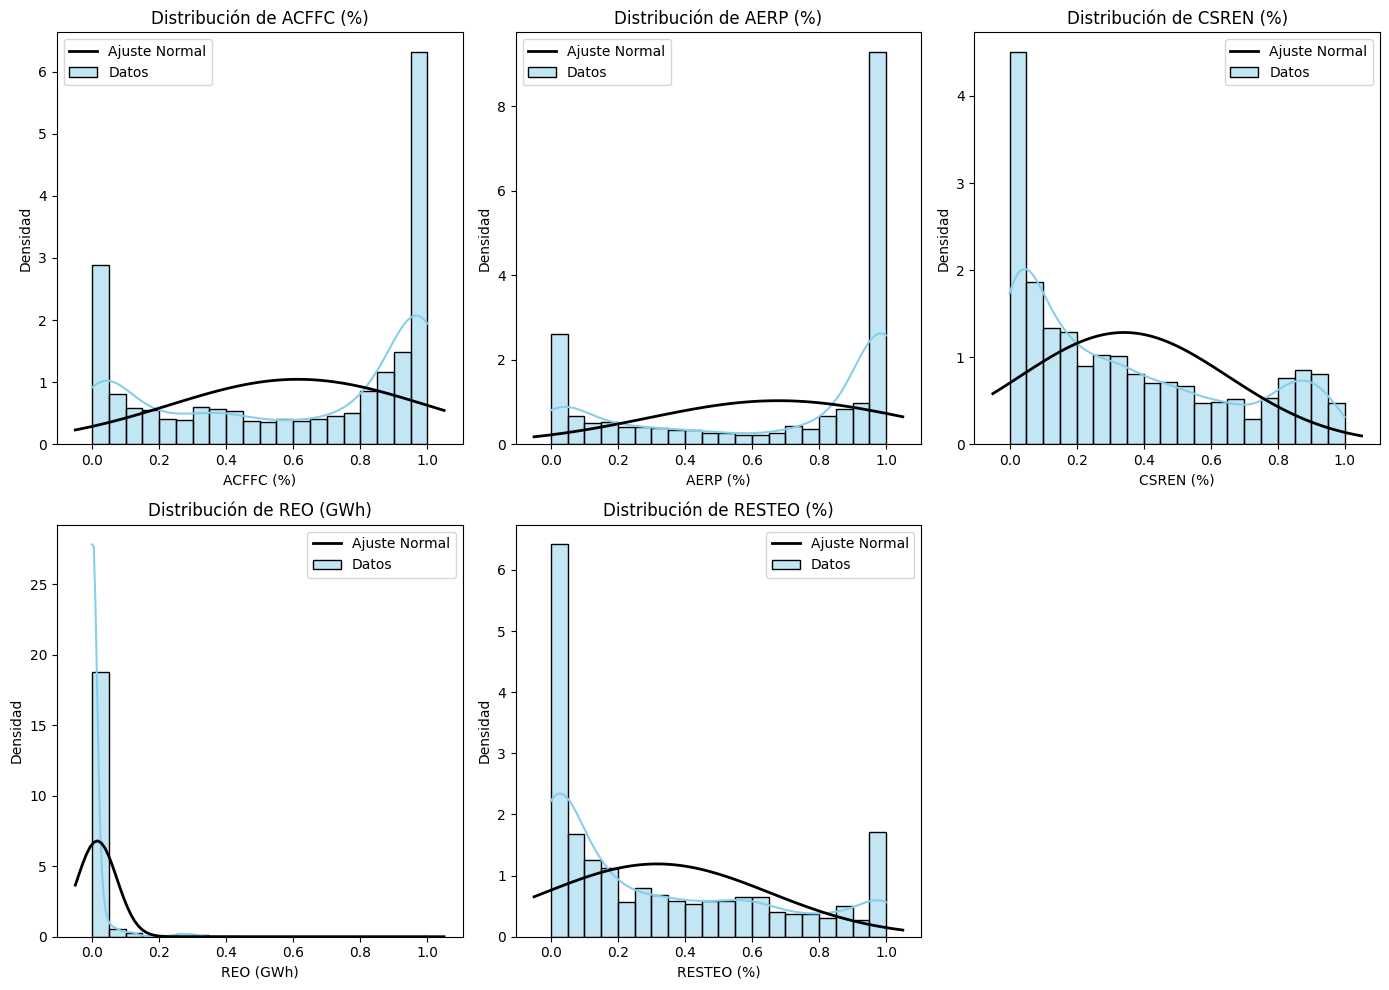

In [173]:
from scipy.stats import norm

plt.figure(figsize=(14, 10))
columns_to_plot = ['ACFFC (%)', 'AERP (%)', 'CSREN (%)', 'REO (GWh)', 'RESTEO (%)']
# Graficar histogramas con ajuste a distribución normal
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(ren_ener[col], kde=True, bins=20, color='skyblue', stat='density', label='Datos')

    # Ajuste normal
    mu, std = norm.fit(ren_ener[col].dropna())  # Eliminar NaN antes de ajustar
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Ajuste Normal')

    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.legend()

plt.tight_layout()
plt.show()

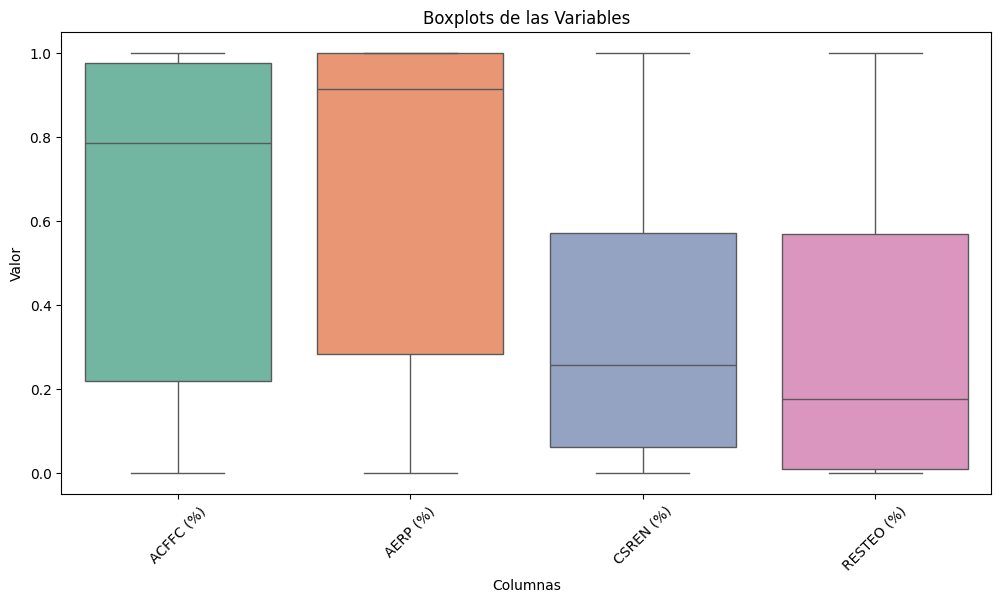

In [174]:
plt.figure(figsize=(12, 6))
col =['ACFFC (%)', 'AERP (%)', 'CSREN (%)', 'RESTEO (%)']
# Graficar boxplot para cada columna [col]
sns.boxplot(data=ren_ener[col], palette='Set2')

plt.title("Boxplots de las Variables")
plt.ylabel("Valor")
plt.xlabel("Columnas")
plt.xticks(rotation=45)
plt.show()

In [175]:
# Seleccionar las columnas a normalizar
columnas = ['ACFFC (%)', 'AERP (%)', 'AETP (%)', 'AEUP (%)', 'CSREN (%)', 'REO (GWh)', 'RESTEO (%)']
ren_ener_norm = ren_ener.copy()
# Aplicar Min-Max Scaling
scaler = MinMaxScaler()
ren_ener_norm[columnas] = scaler.fit_transform(ren_ener_norm[columnas])

# Guardar el dataset normalizado
ren_ener_norm.to_csv("datos_normalizados.csv", index=False)

# Verificar resultados
print(ren_ener_norm.head())

  Country Name  Time  ACFFC (%)  AERP (%)  AETP (%)  AEUP (%)  REO (GWh)  \
3  Afghanistan  2000   0.086630       0.0  0.009499  0.696379   0.000369   
4  Afghanistan  2001   0.093741       0.0  0.007666  0.713689   0.000360   
5  Afghanistan  2002   0.102554       0.0  0.062580  0.730973   0.000408   
6  Afghanistan  2003   0.113270       0.0  0.117431  0.748258   0.000463   
7  Afghanistan  2004   0.122984       0.0  0.172280  0.765574   0.000404   

   RESTEO (%)  CSREN (%)  
3    0.749891   0.557532  
4    0.728115   0.555599  
5    0.790640   0.449897  
6    0.702497   0.434531  
7    0.708908   0.512308  


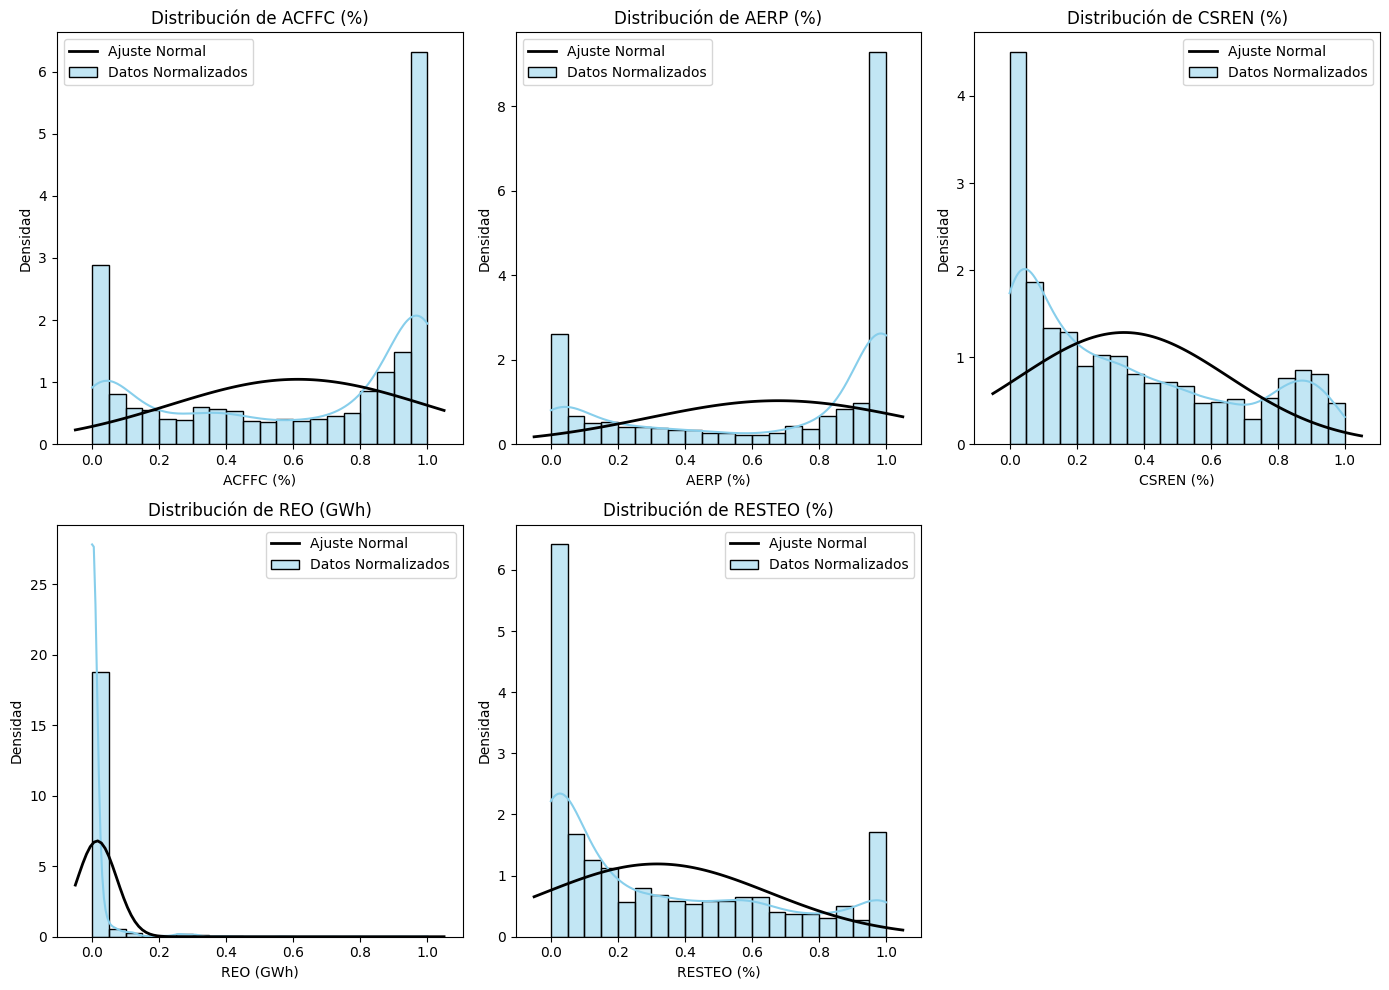

In [176]:
plt.figure(figsize=(14, 10))
columns_to_plot = ['ACFFC (%)', 'AERP (%)', 'CSREN (%)', 'REO (GWh)', 'RESTEO (%)']

# Graficar histogramas con ajuste normal usando los datos normalizados
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(ren_ener_norm[col], kde=True, bins=20, color='skyblue', stat='density', label='Datos Normalizados')

    # Ajuste normal
    mu, std = norm.fit(ren_ener_norm[col].dropna())  # Ajustar la distribución eliminando NaN
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Ajuste Normal')

    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.legend()

plt.tight_layout()
plt.show()

In [177]:
print("Valores antes de normalizar:")
print(ren_ener.describe())

print("\nValores después de normalizar:")
print(ren_ener_norm.describe())

Valores antes de normalizar:
              Time    ACFFC (%)     AERP (%)     AETP (%)     AEUP (%)  \
count  3014.000000  3014.000000  3014.000000  3014.000000  3014.000000   
mean   2008.022893     0.613883     0.678279    76.583035    87.879232   
std       4.894554     0.381729     0.387057    31.949382    20.843433   
min    2000.000000     0.000000     0.000000     0.010000     0.010000   
25%    2004.000000     0.217151     0.283593    54.648233    85.530415   
50%    2008.000000     0.785578     0.914264    96.734638    99.202469   
75%    2012.000000     0.975814     1.000000   100.000000   100.000000   
max    2016.000000     1.000000     1.000000   100.000000   100.000000   

         REO (GWh)   RESTEO (%)    CSREN (%)  
count  3014.000000  3014.000000  3014.000000  
mean      0.015242     0.317061     0.341317  
std       0.058681     0.335171     0.310920  
min       0.000000     0.000000     0.000000  
25%       0.000014     0.009965     0.061766  
50%       0.001009    

### Como trabajaremos con los valores vacios en este caso?
Se seleccionaran 3 paises por continente, los tres mejores y peores en materia de acceso a la electricidad por porcentaje de la población para conocer su situación y avance a lo largo de los años. A partir de trabajar con datos mas reducidos. Analizaremos cada situación particular.

In [37]:
!pip install pycountry-convert #Nuestro dataframe tiene paises pero no continentes, asi que necesitamos tener una libreria externa donde podamos
#Conectar el pais con el continente al que pertenence

import pycountry_convert as pc #Importamos la libreria externa

def get_continent(country): #Obtenemos el continente dependiendo del país
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        return continent_name
    except:
        return None

ren_ener['Continent'] = ren_ener['Country Name'].apply(get_continent)
#Agregamos las columna de continente al dataframe en el que estamos trabajando para poder clasificarlos


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 25.6 MB/s eta 0:00:00


In [42]:
print(ren_ener['Continent'].unique()) #Chequeamos como se agrego la columna, aparece una nueva columna con las iniciales del continente
#Verificamos ademas los continentes que aparecen en la lista, estos son:
# Asia
# Europa
# Africa
# Oceania
# Norte America
# Sudamerica

['AS' 'EU' 'AF' 'OC' 'NA' 'SA' None]


In [54]:
count_2016 = ren_ener[ren_ener['Time'] == 2016] #Para obtener los valores comparativos, primero filtramos para que esten todos en el mismo periodo de tiempo

        Country Name  Time  ACFFC (%)    AERP (%)    AETP (%)    AEUP (%)  \
19       Afghanistan  2016      32.44   78.961074   84.137138   98.038414   
39           Albania  2016      77.42  100.000000  100.000000  100.000000   
59           Algeria  2016      92.62   98.955372   99.439568   99.634430   
79    American Samoa  2016        NaN         NaN         NaN         NaN   
99           Andorra  2016     100.00  100.000000  100.000000  100.000000   
...              ...   ...        ...         ...         ...         ...   
4799    Western Asia  2016        NaN         NaN         NaN         NaN   
4819  Western Sahara  2016        NaN         NaN         NaN         NaN   
4839           World  2016        NaN         NaN         NaN         NaN   
4859          Zambia  2016      16.43    2.657746   27.219337   62.015373   
4879        Zimbabwe  2016      29.05   15.575584   38.145138   85.500160   

      EILPE (MJ/2011 USD PPP)  REO (GWh)  RESTEO (%)  Ren cons (TJ)  \
19  

In [48]:
#creamos dataframes segun el continente y los mejores y peores de cada uno en acceso energetico
# África
df_africa = count_2016[count_2016['Continent'] == 'AF'] #Selecciono aquellos valores cuyo contienente sea Africa
mejores_africa = df_africa.sort_values('AETP (%)', ascending=False).head(3) #Tomo los 3 primeros valores en la columna AETP ya que esta ordenado de mayor a menor
peores_africa = df_africa.sort_values('AETP (%)').head(3) #Tomo los 3 primeros valores en la columna AETP ya que esta ordenado de menor a mayor

# Asia
df_asia = count_2016[count_2016['Continent'] == 'AS']
mejores_asia = df_asia.sort_values('AETP (%)', ascending=False).head(3)
peores_asia = df_asia.sort_values('AETP (%)').head(3)

# Europa
df_europa = count_2016[count_2016['Continent'] == 'EU']
mejores_europa = df_europa.sort_values('AETP (%)', ascending=False).head(3)
peores_europa = df_europa.sort_values('AETP (%)').head(3)

# Norte América
df_NAmerica = count_2016[count_2016['Continent'] == 'NA']
mejores_america = df_NAmerica.sort_values('AETP (%)', ascending=False).head(3)
peores_america = df_NAmerica.sort_values('AETP (%)').head(3)

# Sudamérica
df_SUmerica = count_2016[count_2016['Continent'] == 'SA']
mejores_america = df_SUmerica.sort_values('AETP (%)', ascending=False).head(3)
peores_america = df_SUmerica.sort_values('AETP (%)').head(3)

# Oceanía
df_oceania = count_2016[count_2016['Continent'] == 'OC']
mejores_oceania = df_oceania.sort_values('AETP (%)', ascending=False).head(3)
peores_oceania = df_oceania.sort_values('AETP (%)').head(3)


In [49]:
mejores_total = pd.concat([
    mejores_africa, mejores_asia, mejores_europa, mejores_america, mejores_oceania
])

peores_total = pd.concat([
    peores_africa, peores_asia, peores_europa, peores_america, peores_oceania
])

In [61]:
#Chequeamos cuales son los paises y a que continente pertenecen
print(mejores_total[['Country Name', 'Continent']])

          Country Name Continent
2899           Morocco        AF
3779        Seychelles        AF
4439           Tunisia        AF
199            Armenia        AS
899              China        AS
279         Azerbaijan        AS
39             Albania        EU
99             Andorra        EU
259            Austria        EU
179          Argentina        SA
559             Brazil        SA
879              Chile        SA
239          Australia        OC
959       Cook Islands        OC
1519  French Polynesia        OC


In [60]:
#Chequeamos cuales son los paises y a que continente pertenecen
print(peores_total[['Country Name', 'Continent']])

          Country Name Continent
659            Burundi        AF
839               Chad        AF
3979       South Sudan        AF
679           Cambodia        AS
2939           Myanmar        AS
319         Bangladesh        AS
39             Albania        EU
99             Andorra        EU
259            Austria        EU
1799            Guyana        SA
4199          Suriname        SA
499            Bolivia        SA
3399  Papua New Guinea        OC
3899   Solomon Islands        OC
4699           Vanuatu        OC


Conociendo cuales son los paises que analizaremos, podemos filtrar el data frame original para obtener los valores historicos en las columnas que pertenezcan a los mismos.

En el caso de Europa se encuentra que los paises mejores y peores son coincidentes ya que todos tiene un procentaje de acceso a la electricidad del 100%.

In [98]:
pais_fil = ['Morocco','Seychelles','Tunisia', 'Armenia', 'China', 'Azerbaijan','Albania', 'Andorra', 'Austria', 'Argentina', 'Brazil', 'Chile', 'Australia', 'Cook Islands', 'French Polynesia', 'Burundi', 'Chad', 'South Sudan', 'Cambodia', 'Myanmar', 'Bangladesh', 'Guyana', 'Suriname', 'Bolivia', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu']

In [99]:
ren_pais = ren_ener[ren_ener['Country Name'].isin(pais_fil)].reset_index() #Creamos un dataframe para los paises seleccionados
ren_pais.drop(['index'], axis=1, inplace=True)

In [100]:
ren_pais.head()

,Country Name,Time,ACFFC (%),AERP (%),AETP (%),AEUP (%),RESTEO (%),CSREN (%),TFEC (TJ),Continent
0,Albania,1997,NaN,100.0,100.0,100.0,96.174445,55.953349,34537.038804,EU
1,Albania,1998,NaN,100.0,100.0,100.0,96.320219,49.983365,38503.989936,EU
2,Albania,1999,NaN,100.0,100.0,100.0,97.329158,42.718313,61199.209224,EU
3,Albania,2000,39.8,100.0,100.0,100.0,96.149016,41.445416,61700.913468,EU
4,Albania,2001,42.7,100.0,100.0,100.0,95.308311,39.125664,63173.369160,EU


Chequemos los datos nulos y analizamos que hacer en cada caso particular

In [101]:
ren_pais.shape #Vemos cuantos datos tenemos en el df

(540, 10)

In [102]:
#Describimos los datos en el mismo df
ren_pais.describe()

,Time,ACFFC (%),AERP (%),AETP (%),AEUP (%),RESTEO (%),CSREN (%),TFEC (TJ)
count,540.000000,442.000000,518.000000,540.000000,540.000000,513.000000,495.000000,5.130000e+02
mean,2006.500000,58.190656,68.105599,71.366755,85.626884,31.308107,34.392488,2.439168e+06
std,5.771628,39.258229,37.644296,36.385731,24.472538,33.304592,28.303793,9.715337e+06
min,1997.000000,0.500000,0.007659,0.010000,0.010000,0.000000,0.000000,0.000000e+00
25%,2001.750000,11.470000,30.516960,40.445708,83.563782,1.121661,10.950516,9.411103e+03
50%,2006.500000,77.900000,90.926757,95.422226,98.719051,18.622826,27.390572,1.031829e+05
75%,2011.250000,93.927500,99.957081,99.809282,99.999662,53.942245,52.525501,6.321007e+05
max,2016.000000,100.000000,100.000000,100.000000,100.000000,100.000000,97.923782,7.318315e+07


In [103]:
ren_pais.isna().sum()

,0
Country Name,0
Time,0
ACFFC (%),98
AERP (%),22
AETP (%),0
AEUP (%),0
RESTEO (%),27
CSREN (%),45
TFEC (TJ),27
Continent,0


## Análisis climático

In [ ]:
print(clim_pais.head())
print(clim_pais.columns)

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

In [ ]:
df_air = clim_pais.dropna(subset=['air_quality_Carbon_Monoxide'])
top_3_peor_aire = df_air.groupby('country')['air_quality_Carbon_Monoxide'].mean().sort_values(ascending=False).head(3)
print(top_3_peor_aire)

country
Indonesia    3484.215068
Malaysia     3421.260826
Chile        3039.996121
Name: air_quality_Carbon_Monoxide, dtype: float64


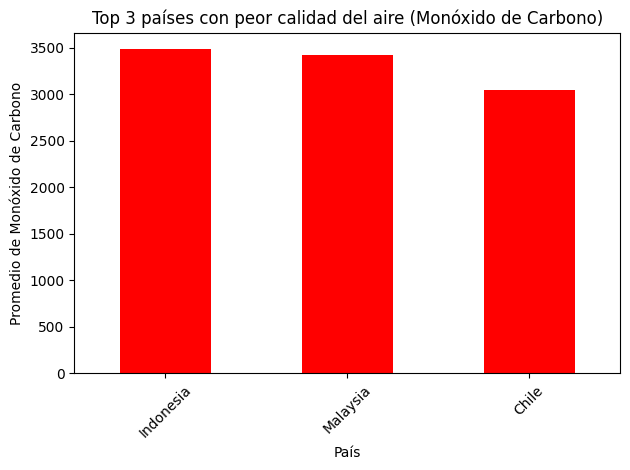

In [ ]:
# Crear la gráfica
top_3_peor_aire.plot(kind='bar', color='red')

# Títulos y etiquetas
plt.title('Top 3 países con peor calidad del aire (Monóxido de Carbono)')
plt.ylabel('Promedio de Monóxido de Carbono')
plt.xlabel('País')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


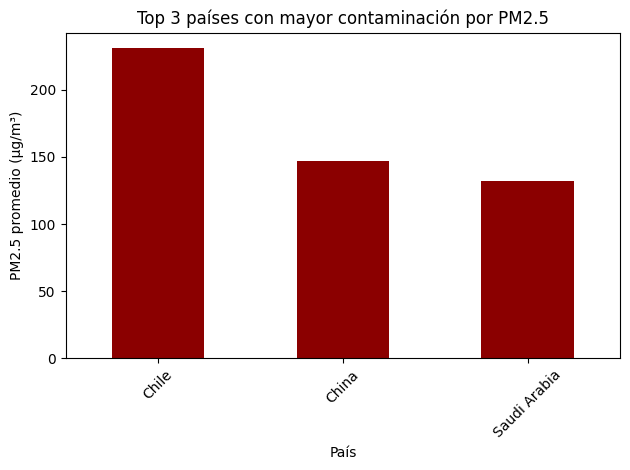

In [ ]:
top_3_pm25 = df_air.groupby('country')['air_quality_PM2.5'].mean().sort_values(ascending=False).head(3)
top_3_pm25.plot(kind='bar', color='darkred')
plt.title('Top 3 países con mayor contaminación por PM2.5')
plt.ylabel('PM2.5 promedio (μg/m³)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
ren_ener.columns

Index(['Country Name', 'Time',
       'Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]',
       'Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]',
       'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
       'Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]',
       'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
       'Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]',
       'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
       'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
       'Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]',
       'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
       'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]'],
     

In [ ]:
clim_pais = clim_pais.rename(columns={'country': 'Country Name'})

Estandarización el dataset de patrones climáticos por país para facilitar la comparación entre sí


In [ ]:
from sklearn.preprocessing import StandardScaler


clim_pais = clim_pais.copy()


num_cols = clim_pais.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()


clim_pais[num_cols] = scaler.fit_transform(clim_pais[num_cols])


In [ ]:
print(clim_pais[num_cols].mean())


latitude                       -5.690029e-18
longitude                      -7.812397e-19
last_updated_epoch             -1.245317e-14
temperature_celsius             3.824950e-16
temperature_fahrenheit          2.933295e-16
wind_mph                       -2.541633e-16
wind_kph                        3.541620e-17
wind_degree                    -5.687425e-17
pressure_mb                     3.522454e-15
pressure_in                     7.746565e-15
precip_mm                       4.104113e-17
precip_in                       1.812476e-17
humidity                        1.479147e-17
cloud                          -4.999934e-17
feels_like_celsius             -3.774950e-16
feels_like_fahrenheit           4.616606e-16
visibility_km                  -3.187458e-16
visibility_miles                2.270803e-16
uv_index                        1.908308e-16
gust_mph                        8.999882e-17
gust_kph                        3.533287e-16
air_quality_Carbon_Monoxide     7.791564e-17
air_qualit

In [ ]:
print(clim_pais[num_cols].std())

latitude                        1.000007
longitude                       1.000007
last_updated_epoch              1.000007
temperature_celsius             1.000007
temperature_fahrenheit          1.000007
wind_mph                        1.000007
wind_kph                        1.000007
wind_degree                     1.000007
pressure_mb                     1.000007
pressure_in                     1.000007
precip_mm                       1.000007
precip_in                       1.000007
humidity                        1.000007
cloud                           1.000007
feels_like_celsius              1.000007
feels_like_fahrenheit           1.000007
visibility_km                   1.000007
visibility_miles                1.000007
uv_index                        1.000007
gust_mph                        1.000007
gust_kph                        1.000007
air_quality_Carbon_Monoxide     1.000007
air_quality_Ozone               1.000007
air_quality_Nitrogen_dioxide    1.000007
air_quality_Sulp